<a href="https://colab.research.google.com/github/JSJeong-me/KOSA_Generate_AI_for_Image/blob/main/231-HairStyle_Vector_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Embedding Images

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
import numpy as np

In [ ]:
model_url = "https://tfhub.dev/tensorflow/efficientnet/lite0/feature-vector/2"

IMAGE_SHAPE = (224, 224)

layer = hub.KerasLayer(model_url)
model = tf.keras.Sequential([layer])

In [ ]:
def extract(file):
  file = Image.open(file).convert('L').resize(IMAGE_SHAPE)
  display(file)

  file = np.stack((file,)*3, axis=-1)

  file = np.array(file)/255.0

  embedding = model.predict(file[np.newaxis, ...])
  #print(embedding)
  vgg16_feature_np = np.array(embedding)
  flattended_feature = vgg16_feature_np.flatten()

  #print(len(flattended_feature))
  #print(flattended_feature)
  #print('-----------')
  return flattended_feature

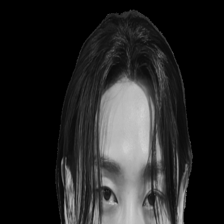

1/1 [==============================] - 8s 8s/step


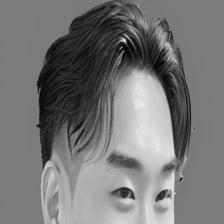

1/1 [==============================] - 0s 21ms/step


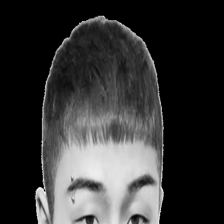

1/1 [==============================] - 0s 21ms/step


In [ ]:
ail_base = extract('JUMP-upper.png')
ail1 = extract('upper_jump(91).png')
crop_base = extract('CROP-upper.png')

# Distances Images

In [ ]:
from scipy.spatial import distance

In [ ]:
metric = 'dice'

In [ ]:
dc = distance.cdist([ail_base], [ail_base], metric)[0]
print(dc)
print("the distance between cat1 and the cat1 is {}".format(dc))

[0.00936487]
the distance between cat1 and the cat1 is [0.00936487]


In [ ]:
dc = distance.cdist([ail_base], [ail1], metric)[0]
print(dc)
print("the distance between cat1 and the cat2 is {}".format(dc))

[0.29963584]
the distance between cat1 and the cat2 is [0.29963584]


In [ ]:
dc = distance.cdist([ail_base], [crop_base], metric)[0]
print(dc)
print("the distance between cat1 and the rocket is {}".format(dc))

[0.36800377]
the distance between cat1 and the rocket is [0.36800377]


In [ ]:
dc = distance.cdist([ail1], [crop_base], metric)[0]
print(dc)
print("the distance cat2 original and the rocket is {}".format(dc))

[0.20115836]
the distance cat2 original and the rocket is [0.20115836]
